# Câu hỏi 3: Thực trạng nhiên liệu ngành hàng không

Ngành hàng không đóng vai trò rất quan trọng trong sự phát triển chung, đặc biệt là các nước châu Âu nơi giao thoa văn hóa, thêm vào đó việc tiêu thụ nguyên liệu hóa thạch này cũng ảnh hương đến môi trường không ít.

## Câu hỏi sẽ trả lời

- Biết được các mục đích sử dụng chính của dầu hàng không 
<p> - Đối với toàn châu Âu: Có thể biết được nguyên nhân nào dẫn đến ô nhiễm môi trường trong thời gian đó và từ đó tìm cách để khắc phục.<p> 
<p> - Đối với Việc Nam: Ta có thể xem dầu hàng không có những tác dụng gì và vận dụng và để ý kỹ hơn về vấn đề ô nhiễm môi trường.<p>


- Biết được top quốc gia tiêu thụ xăng hàng không nhiều nhất
<p> - Đối với toàn châu Âu: Tiến hành xuất khẩu xăng hàng công cho các nước Châu Âu tiêu thụ xăng hàng không nhiều.<p> 
<p> - Đối với Việc Nam: Cũng xuất khẩu xăng hàng công cho các nước Châu Âu tiêu thụ xăng hàng không nhiều, và tiến hành hợp tác vì các nước
tiêu thụ xăng hàng không nhiều thường có mối quan hệ ngoại giao tốt .<p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Europe_new.csv')
df.head(10)

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates
5,Belgium,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",25.0,additives_and_oxygenates
6,Belgium,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",22.0,additives_and_oxygenates
7,Belgium,Additives and Oxygenates - Exports,2009,"Metric tons, thousand",45.0,additives_and_oxygenates
8,Czechia,Additives and Oxygenates - Exports,1998,"Metric tons, thousand",1.0,additives_and_oxygenates
9,Czechia,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",7.0,additives_and_oxygenates


## Danh mục các mục đích sử dụng của nhiên liệu hàng không

In [4]:
aviation = df[df['category']=='aviation_gasoline']
set(aviation['commodity_transaction'])

{'Aviation gasoline - Consumption by manufacturing, construction and non-fuel industry',
 'Aviation gasoline - Consumption by other',
 'Aviation gasoline - Consumption by other manuf., const. and non-fuel ind.',
 'Aviation gasoline - Consumption by transport',
 'Aviation gasoline - Consumption by transport equipment ',
 'Aviation gasoline - Consumption in domestic aviation',
 'Aviation gasoline - Consumption not elsewhere specified (other)',
 'Aviation gasoline - Exports',
 'Aviation gasoline - Final consumption',
 'Aviation gasoline - Final energy consumption',
 'Aviation gasoline - Imports',
 'Aviation gasoline - International aviation bunkers',
 'Aviation gasoline - Losses',
 'Aviation gasoline - Production',
 'Aviation gasoline - Stock changes',
 'Aviation gasoline - Total energy supply',
 'Aviation gasoline - Transfers and recycled products',
 'Aviation gasoline - production from plants',
 'Aviation gasoline - production from refineries'}

Hãy cùng xem có phải tất cả nhiên liệu đều được dùng cho vẫn chuyển nước ngoài hay không.
Ta sẽ cùng tính tỉ lệ 

Cùng tính toán tổng lượng nhiên liệu cho từng mục đích

In [5]:
#Lượng tiêu thụ của từng nhu cầu
consumption = aviation[aviation['commodity_transaction'].str.find('Consumption') != -1].groupby('commodity_transaction')['quantity'].sum()
# Lượng tiêu thụ tổng
final_consumption = aviation[aviation['commodity_transaction'] == "Aviation gasoline - Final consumption"]['quantity'].sum()

Tính tỉ lệ

In [6]:
consumption = consumption.drop('Aviation gasoline - Consumption in domestic aviation',axis = 0)
consumption = consumption.sort_values(ascending=False)
consumption_rate = consumption*100/final_consumption
consumption_rate

commodity_transaction
Aviation gasoline - Consumption by transport                                            97.796335
Aviation gasoline - Consumption by other                                                 1.832521
Aviation gasoline - Consumption not elsewhere specified (other)                          1.832521
Aviation gasoline - Consumption by manufacturing, construction and non-fuel industry     0.371144
Aviation gasoline - Consumption by other manuf., const. and non-fuel ind.                0.371144
Aviation gasoline - Consumption by transport equipment                                   0.371144
Name: quantity, dtype: float64

Vẽ biểu đồ

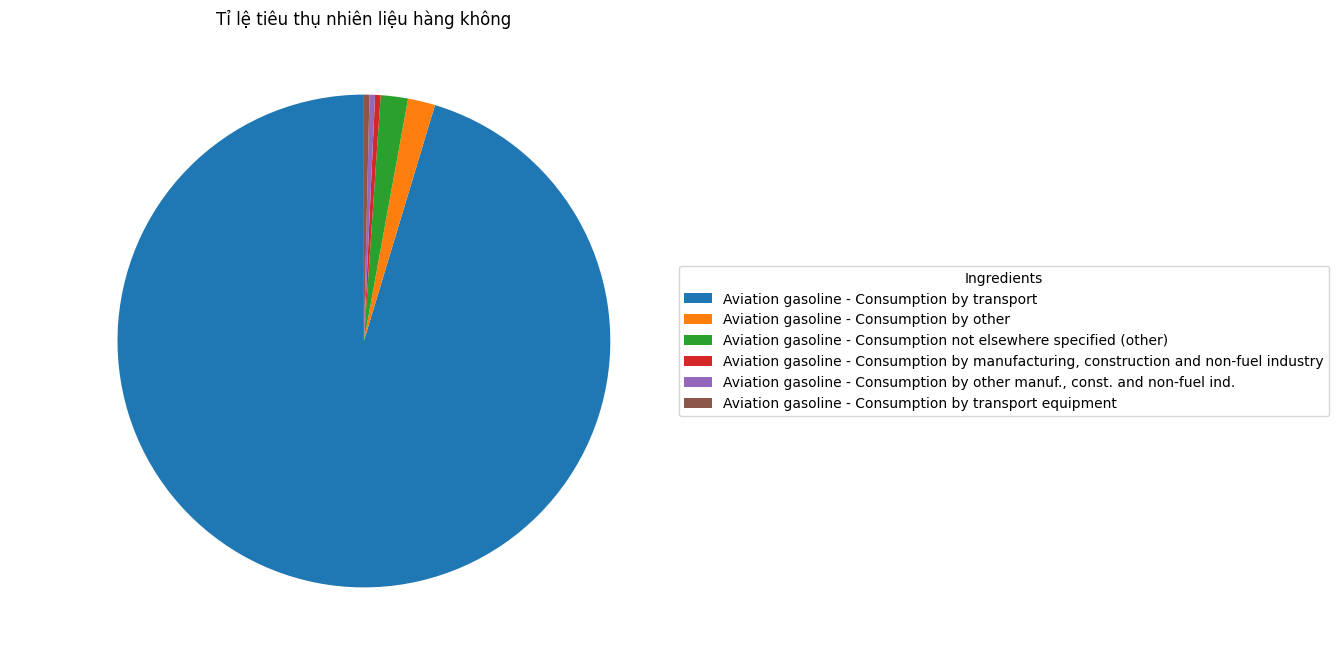

In [7]:
palette_color=sns.color_palette('bright')
fig, ax=plt.subplots(figsize=(14,8))
ax.pie(consumption_rate[0:].values,labels=consumption_rate[0:].index,startangle = 90,textprops=dict(color="w"))
ax.set_title("Tỉ lệ tiêu thụ nhiên liệu hàng không")
plt.legend(title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

### Nhận xét:

- Như hình ảnh và số liệu trên, nhiên liệu hàng không được sử dụng phần lớn vào việc giao thông đường hàng không
- Tuy nhiên vẫn có một phần cho những mục đích khác như sản xuất hay các thiết bị di chuyển khác

## Nước nào tiêu thụ dầu máy bay nhiều nhất

In [14]:
final_consumption_list = df[df['commodity_transaction']=='Aviation gasoline - Final consumption']
count_consump = final_consumption_list.groupby('country_or_area')['quantity'].sum()
sort = count_consump.sort_values(ascending=False)
top = sort[:10]
top

country_or_area
Russian Federation    977.0
United Kingdom        835.0
France                668.0
Germany               480.0
Italy                 242.0
Spain                 214.0
Romania               147.0
Poland                110.0
Sweden                104.0
Finland                76.0
Name: quantity, dtype: float64

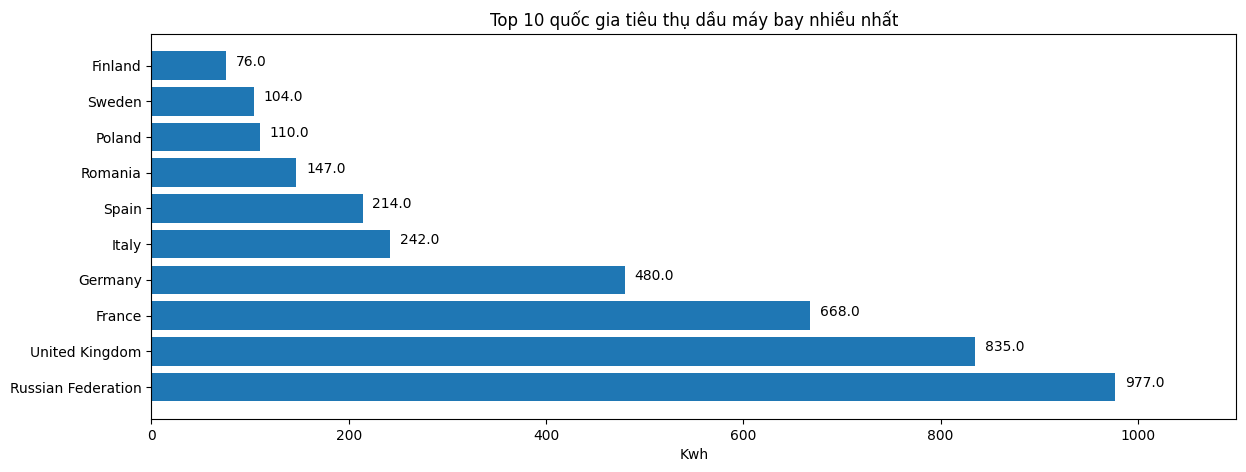

In [24]:
fig, ax=plt.subplots(figsize=(14,5))
ax.barh(top.index,top.values)
ax.set_title('Top 10 quốc gia tiêu thụ dầu máy bay nhiều nhất')
ax.set_xlim([0,1100])
ax.set_xlabel('Kwh')
for x,y in zip(top.values,top.index):
    plt.text(x+10, y, x)

### Nhận xét:

- Như ta thấy, Nga là nước tiêu thụ dầu máy bay nhiều nhất, theo sau đó là Anh và Pháp

### Giải thích:

- Đối với nước Nga, có thể thấy đây là một đất nước rộng lớn, vì thế mà nhu cầu di chuyển trong nước đã khá lớn
- Ngoài ra, các nước có nhu cầu tiêu thụ lớn là do các mối quan hệ quốc tế của họ. Các cường quốc như Anh hay Pháp đều có nền kinh tế giao thương nước ngoài khá nhiều